# Model for Cardiovascular (CVD) Risk Prediction 

## Cardiovascular Disease dataset

The dataset consists of 70,000 records of patients data, 11 features + target

In [768]:
import numpy as np
import pandas as pd

In [769]:
df = pd.read_csv('cardio_train.csv')

In [770]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [772]:
df.drop('id', axis=1, inplace=True)

In [773]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

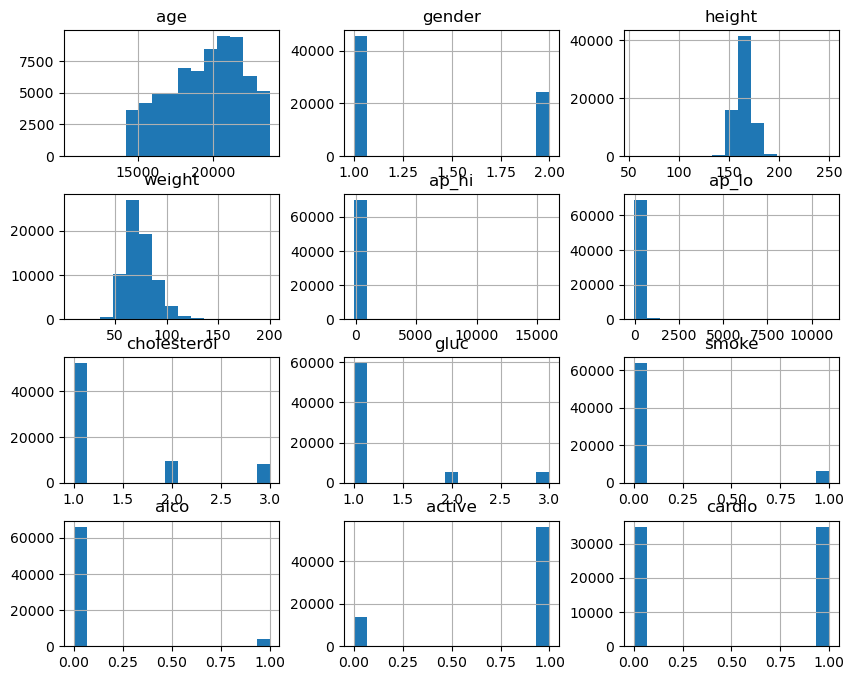

In [774]:
df.hist(bins=15, figsize=(10,8))

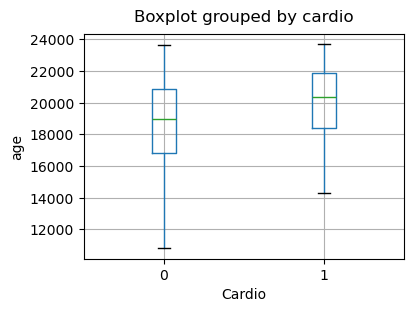

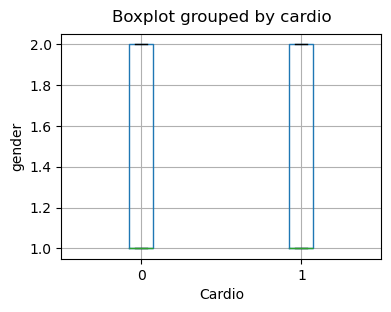

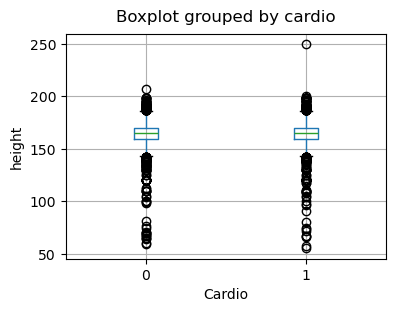

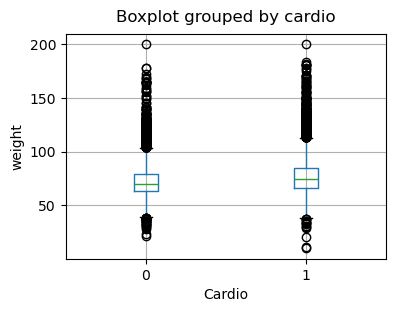

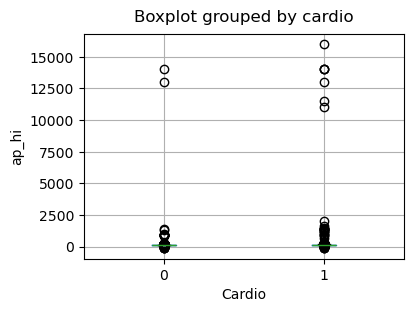

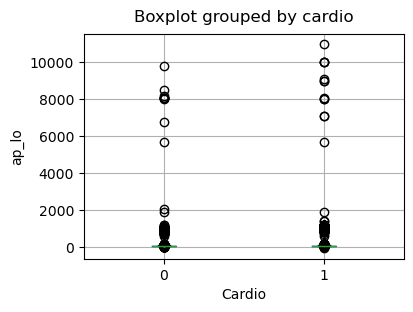

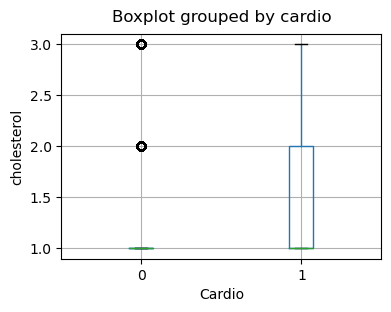

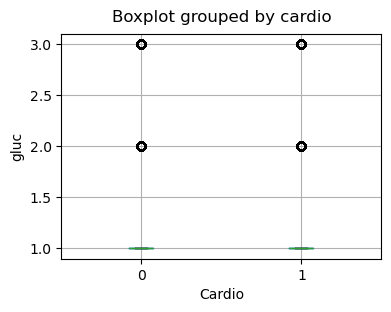

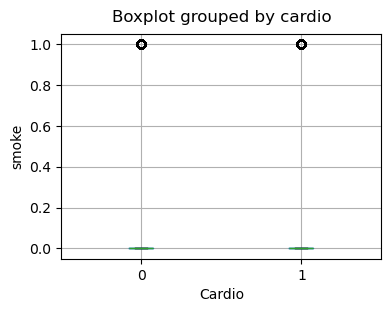

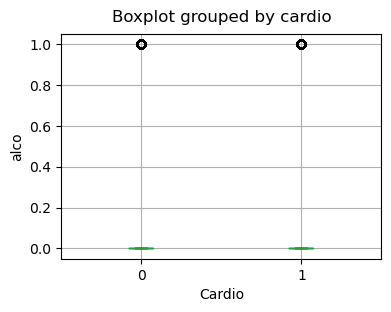

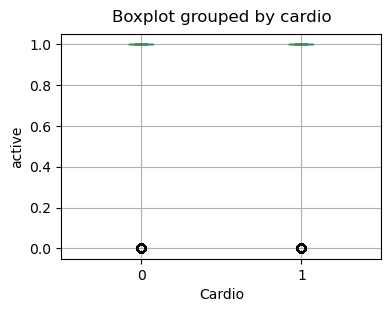

In [775]:
import matplotlib.pyplot as plt
for col in df.columns[:-1]:
  # Create a new figure for each boxplot
  df.boxplot(column=col, by='cardio', figsize=(4, 3))
  plt.title('')
  plt.xlabel("Cardio")
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

In [776]:
def remove_outliers(df, factor):
    for column in ['ap_hi', 'ap_lo', 'weight', 'height']:
        upper_lim = df[column].mean() + df[column].std() * factor
        lower_lim = df[column].mean() - df[column].std() * factor

        # Remove outliers
        df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]
        print(df.shape)
    return df

In [777]:
filtered_df = remove_outliers(df.copy(), factor=2)

(69962, 12)
(69009, 12)
(65873, 12)
(63661, 12)


In [778]:
df[['ap_hi', 'ap_lo', 'weight', 'height']] = filtered_df[['ap_hi', 'ap_lo', 'weight', 'height']]

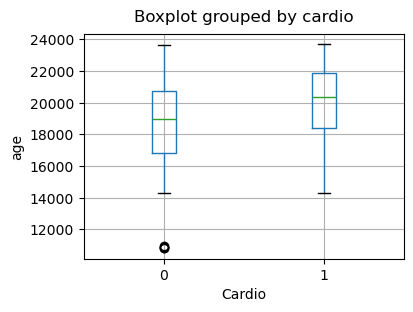

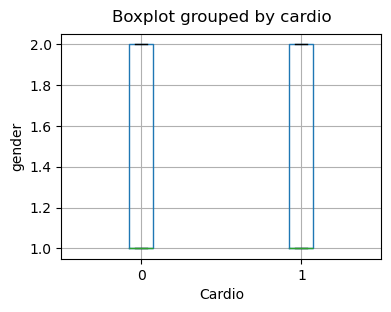

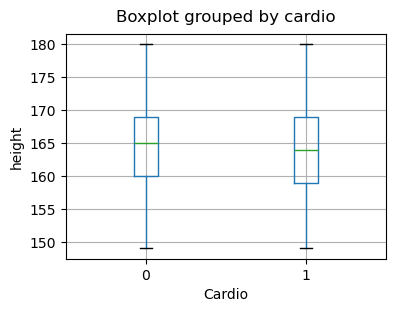

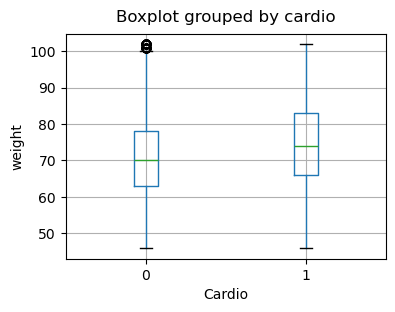

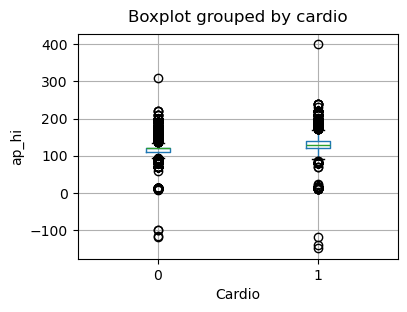

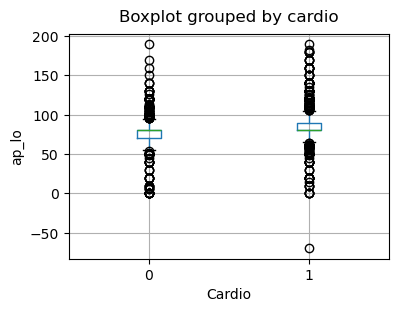

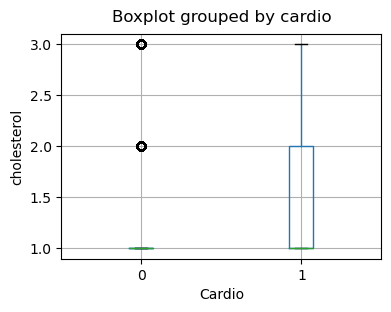

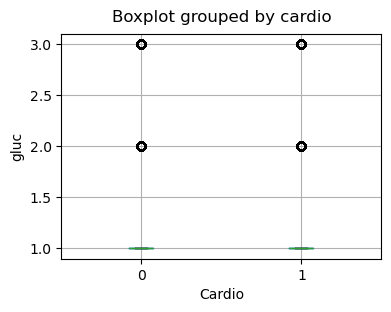

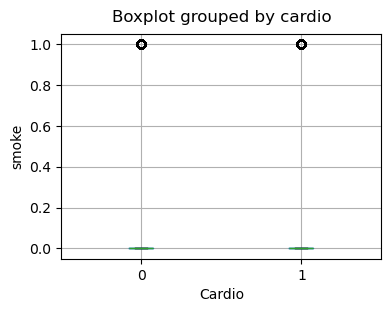

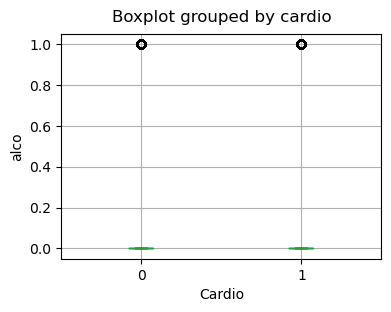

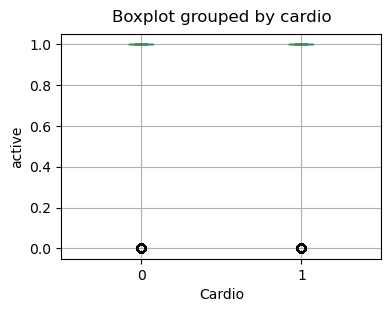

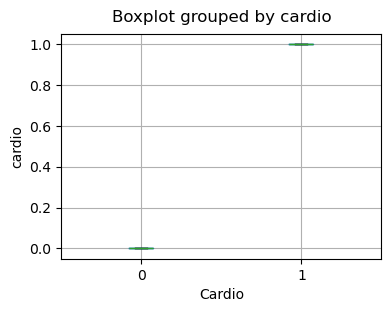

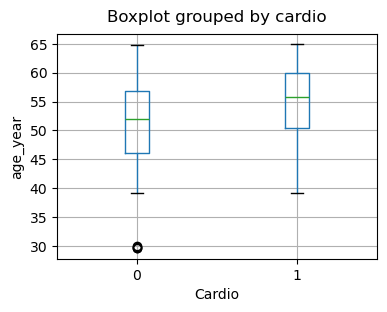

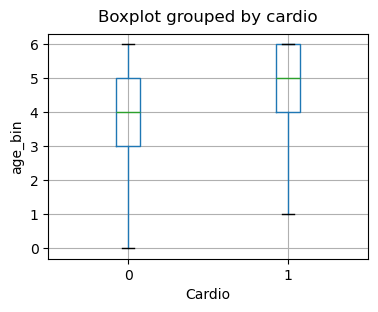

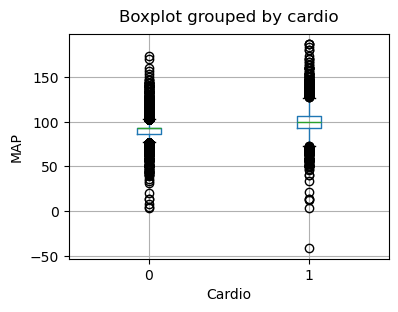

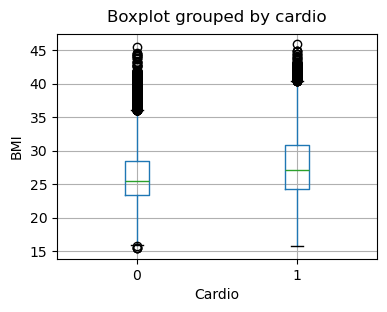

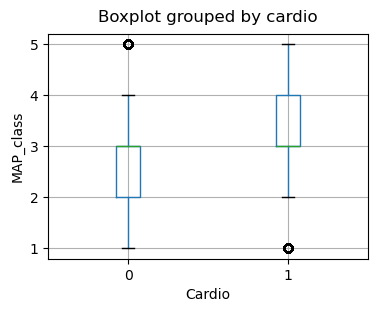

In [779]:
def plot_boxplots(df):
    for col in df.columns[:-1]:
      # Create a new figure for each boxplot
      df.boxplot(column=col, by='cardio', figsize=(4, 3))
      plt.title('')
      plt.xlabel("Cardio")
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

plot_boxplots(df_cleaned)

In [780]:
df = df_cleaned

In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63661 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          63661 non-null  int64   
 1   gender       63661 non-null  int64   
 2   height       63661 non-null  int64   
 3   weight       63661 non-null  float64 
 4   ap_hi        63661 non-null  int64   
 5   ap_lo        63661 non-null  int64   
 6   cholesterol  63661 non-null  int64   
 7   gluc         63661 non-null  int64   
 8   smoke        63661 non-null  int64   
 9   alco         63661 non-null  int64   
 10  active       63661 non-null  int64   
 11  cardio       63661 non-null  int64   
 12  age_year     63661 non-null  float64 
 13  age_bin      63658 non-null  category
 14  MAP          63661 non-null  float64 
 15  BMI          63661 non-null  float64 
 16  MAP_class    61078 non-null  category
 17  BMI_class    63661 non-null  category
dtypes: category(3), float64(4), int

In [782]:
df['cardio'].value_counts()

cardio
0    32629
1    31032
Name: count, dtype: int64

In [783]:
x = df.iloc[:, :-1]
y = df['cardio']

In [784]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_bin,MAP,BMI,MAP_class
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,4,90.000000,21.967120,3
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,5,106.666667,34.927679,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,4,90.000000,23.507805,3
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,3,116.666667,28.710479,5
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,3,73.333333,23.011177,1


In [785]:
y.sample(5)

23533    0
23226    1
65815    1
66655    0
52314    1
Name: cardio, dtype: int64

Binning attributes age

Convert age from days to years and use bining method

In [786]:
# Convert age to years
df['age_year'] = df['age'] / 365

# Define bin edges and labels
bins = [30, 35, 40, 45, 50, 55, 60, 65]
labels = [0, 1, 2, 3, 4, 5, 6]

In [787]:
df['age_bin'] = pd.cut(df['age_year'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

Convert continuous values into categorical values and apply bining methods

Mean Arterial Pressure (MAP) = (2 Diastollic Blood Pressure + Sistolic Blood Pressure)/3

In [788]:
df['MAP'] = (2 * df['ap_lo'] + df['ap_hi']) / 3

In [789]:
# Define bin edges and labels
bins = [70, 80, 90, 100, 110, 120]
labels = [1, 2, 3, 4, 5]

In [790]:
df['MAP_class'] = pd.cut(df['MAP'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

Body Mass Index (BMI) = weight (kg) / height² (m²)

In [791]:
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

In [792]:
# Define bin edges and labels
bins = [0, 15, 18.5, 25, 30, 35, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

In [793]:
df['BMI_class'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

In [794]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_bin,MAP,BMI,MAP_class,BMI_class
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,4,90.000000,21.967120,3,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,5,106.666667,34.927679,4,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,4,90.000000,23.507805,3,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,3,116.666667,28.710479,5,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,3,73.333333,23.011177,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1,53.969863,4,103.333333,23.661439,4,2
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.736986,5,103.333333,29.384757,4,3
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,4,93.333333,26.927438,3,3
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,6,98.333333,27.099251,3,3


In [795]:
columns_to_drop = ['age', 'age_year', 'MAP', 'BMI', 'weight', 'height', 'ap_hi', 'ap_lo']
df = df.drop(columns_to_drop, axis=1)

In [796]:
# Define the desired order of columns
new_order = ['gender', 'age_bin', 'BMI_class', 'MAP_class', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

df = df[new_order]
print(df)

       gender age_bin BMI_class MAP_class  cholesterol  gluc  smoke  alco  \
0           2       4         2         3            1     1      0     0   
1           1       5         4         4            3     1      0     0   
2           1       4         2         3            3     1      0     0   
3           2       3         3         5            1     1      0     0   
4           1       3         2         1            1     1      0     0   
...       ...     ...       ...       ...          ...   ...    ...   ...   
69993       1       4         2         4            1     1      0     0   
69994       1       5         3         4            1     1      0     0   
69995       2       4         3         3            1     1      1     0   
69998       1       6         3         3            1     2      0     0   
69999       1       5         2         3            2     1      0     0   

       active  cardio  
0           1       0  
1           1       1  
2  

Init: initializing centroids
Init: initializing clusters


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 69360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 69360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 69360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 69360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 69360.0
Best run was number 1


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3088, cost: 55227.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5500, cost: 56390.0
Run 2, iteration: 2/100, moves: 597, cost: 56390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5903, cost: 55574.0
Run 3, iteration: 2/100, moves: 3164, cost: 55574.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5753, cost: 55645.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6593, cost: 55574.0
Run 5, iteration: 2/100, moves: 372, cost: 55574.0
Best run was number 1


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12392, cost: 52687.0
Run 1, iteration: 2/100, moves: 3095, cost: 52687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6248, cost: 55698.0
Run 2, iteration: 2/100, moves: 204, cost: 55698.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6089, cost: 53052.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4635, cost: 54883.0
Run 4, iteration: 2/100, moves: 1077, cost: 54883.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6868, cost: 53080.0
Run 5, iteration: 2/100, moves: 1005, cost: 53080.0
Best run was number 1


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7603, cost: 49358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7908, cost: 52765.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4916, cost: 51510.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6079, cost: 50544.0
Run 4, iteration: 2/100, moves: 3396, cost: 50544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6821, cost: 52663.0
Best run was number 1


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3487, cost: 50401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7528, cost: 47977.0
Run 2, iteration: 2/100, moves: 3281, cost: 47977.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2759, cost: 51889.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5231, cost: 48919.0
Run 4, iteration: 2/100, moves: 317, cost: 48919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8662, cost: 47881.0
Best run was number 5


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


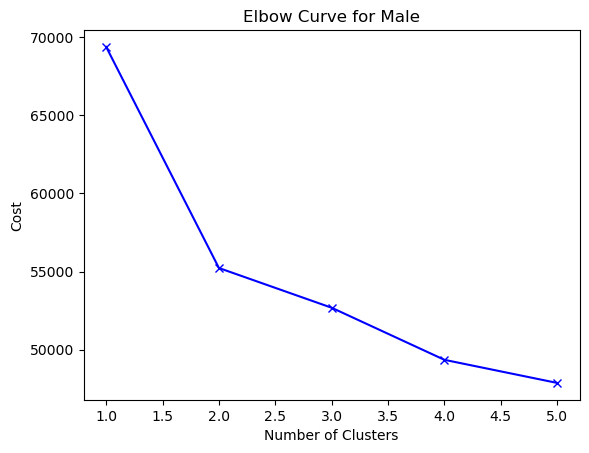

/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 126496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 126496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 126496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 126496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 126496.0
Best run was number 1


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13368, cost: 100613.0
Run 1, iteration: 2/100, moves: 2502, cost: 100613.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8253, cost: 103249.0
Run 2, iteration: 2/100, moves: 4830, cost: 103249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15261, cost: 100438.0
Run 3, iteration: 2/100, moves: 1195, cost: 100438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 16907, cost: 100613.0
Run 4, iteration: 2/100, moves: 2548, cost: 100613.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5508, cost: 100438.0
Best run was number 3


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19147, cost: 93195.0
Run 1, iteration: 2/100, moves: 1833, cost: 93195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 93373.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 104004.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11742, cost: 98038.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8735, cost: 95167.0
Best run was number 1


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6856, cost: 92429.0
Run 1, iteration: 2/100, moves: 296, cost: 92429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4549, cost: 94277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6076, cost: 92962.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12295, cost: 88525.0
Run 4, iteration: 2/100, moves: 1289, cost: 88525.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11116, cost: 92304.0
Best run was number 4


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5630, cost: 89235.0
Run 1, iteration: 2/100, moves: 884, cost: 89235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12637, cost: 89794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 19541, cost: 89278.0
Run 3, iteration: 2/100, moves: 6404, cost: 84140.0
Run 3, iteration: 3/100, moves: 3738, cost: 84140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 91844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4932, cost: 83476.0
Best run was number 5


/Users/kamme/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


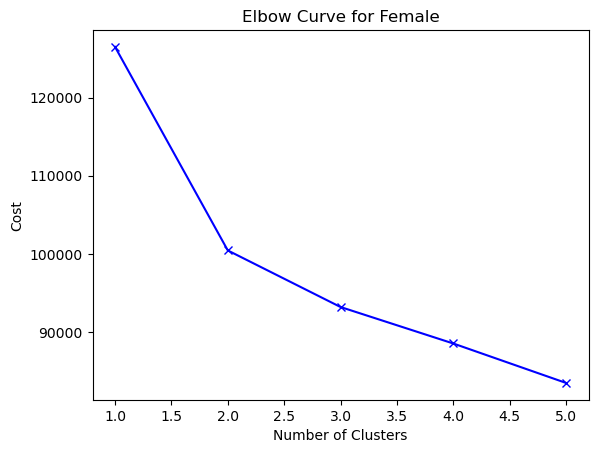

TypeError: category dtype does not support aggregation 'mean'

In [797]:
import pandas as pd
from kmodes.kmodes import KModes

def kmodes_by_gender(data, gender):
  cost = []
  for num_clusters in range(1, 6):
      kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
      kmode.fit_predict(data)
      cost.append(kmode.cost_)

  plt.plot(range(1, 6), cost, marker='x', color='blue')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Cost')
  plt.title(f'Elbow Curve for {gender}')
  plt.show()

  # Add cluster labels to the data for this gender
  data['cluster'] = kmode.labels_
  return data

# Split the data by gender
female_data = df[df['gender'] == 1]
male_data = df[df['gender'] == 2]

# Select relevant categorical columns for clustering
male_features = male_data[:]
female_features = female_data[:]

# Perform KModes clustering for males and females
clustered_males = kmodes_by_gender(male_features.copy(), 'Male')
clustered_females = kmodes_by_gender(female_features.copy(), 'Female')

# Combine the clustered DataFrames
df_clustered = pd.concat([clustered_males, clustered_females])

# Analyze the clusters for each gender separately
print(clustered_males.groupby('cluster').mean())
print(clustered_females.groupby('cluster').mean())

In [798]:
df = df_clustered

In [799]:
# Define the desired order of columns
new_order = ['cluster','gender', 'age_bin', 'BMI_class', 'MAP_class', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Reorder the columns
df = df[new_order]
print(df)

       cluster  gender age_bin BMI_class MAP_class  cholesterol  gluc  smoke  \
0            2       2       4         2         3            1     1      0   
3            0       2       3         3         5            1     1      0   
7            1       2       6         3         4            3     3      0   
11           2       2       4         2         3            1     1      0   
12           3       2       2         2         3            1     1      0   
...        ...     ...     ...       ...       ...          ...   ...    ...   
69992        4       1       4         2         5            1     1      0   
69993        0       1       4         2         4            1     1      0   
69994        0       1       5         3         4            1     1      0   
69998        0       1       6         3         3            1     2      0   
69999        1       1       5         2         3            2     1      0   

       alco  active  cardio  
0        

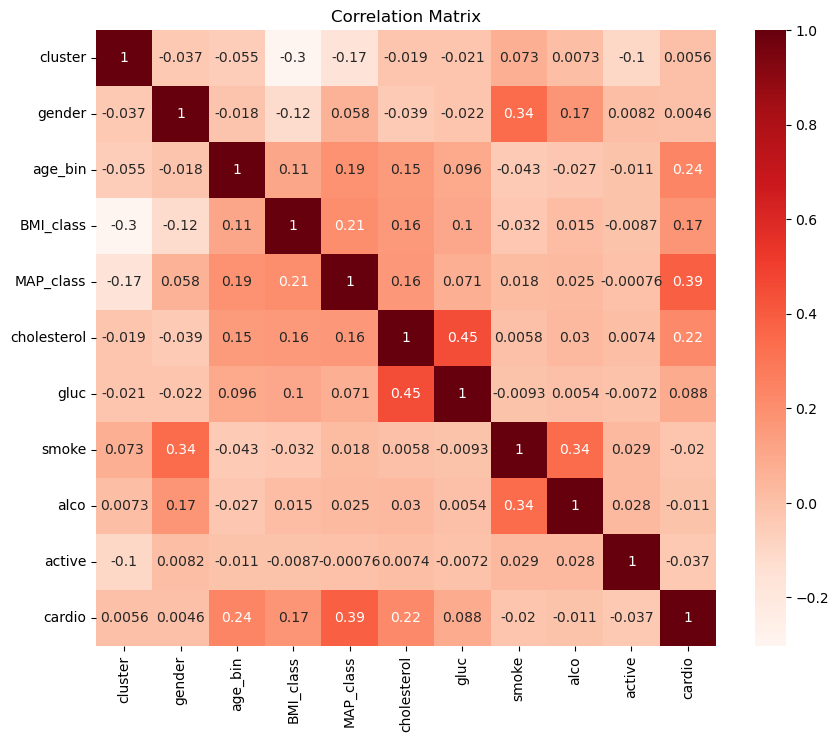

In [800]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

Split data 80:20

In [801]:
x = df.iloc[:,0:10]
y = df['cardio']

In [802]:
x.head()

,cluster,gender,age_bin,BMI_class,MAP_class,cholesterol,gluc,smoke,alco,active
0,2,2,4,2,3,1,1,0,0,1
3,0,2,3,3,5,1,1,0,0,1
7,1,2,6,3,4,3,3,0,0,1
11,2,2,4,2,3,1,1,0,0,1
12,3,2,2,2,3,1,1,0,0,0


In [803]:
y.sample(5)

33218    0
55837    1
66365    1
9293     0
36948    1
Name: cardio, dtype: int64

In [804]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [805]:
X_train.shape

(50928, 10)

In [806]:
y_train.shape

(50928,)

In [807]:
x_test.shape

(12733, 10)

In [812]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)

# Set parameters
params = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Perform 10-fold cross-validation
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=10, early_stopping_rounds=10, metrics={'auc'}, as_pandas=True)

# Print the cross-validation results
print(cv_results)

# Train the final model on the entire dataset
model = xgb.train(params, dtrain, num_boost_round=cv_results['test-auc-mean'].idxmax())

# Make predictions on the test set
y_pred = model.predict(dtest)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.888393       0.000948       0.888361      0.005466
1         0.888767       0.001466       0.888679      0.005754
2         0.888782       0.001487       0.888674      0.005713
3         0.888586       0.001175       0.888456      0.005671
4         0.889020       0.001317       0.888695      0.005456
..             ...            ...            ...           ...
95        0.975534       0.000481       0.974865      0.001935
96        0.975603       0.000452       0.974956      0.001921
97        0.975723       0.000429       0.975084      0.001932
98        0.975793       0.000418       0.975137      0.001931
99        0.975889       0.000422       0.975230      0.001925

[100 rows x 4 columns]


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6544
           1       0.92      0.89      0.91      6189

    accuracy                           0.91     12733
   macro avg       0.91      0.91      0.91     12733
weighted avg       0.91      0.91      0.91     12733



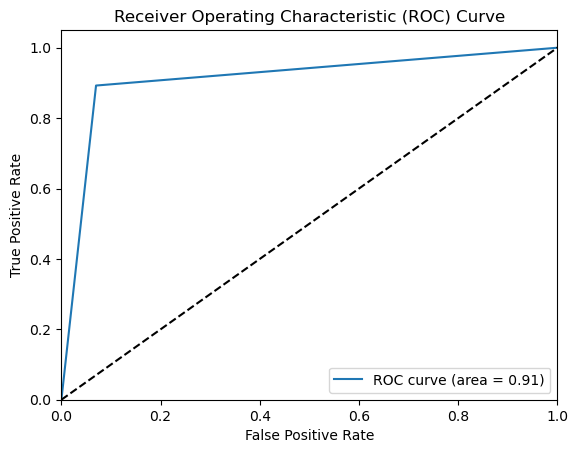

In [813]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)

# Classification Report
print(classification_report(y_test, y_pred_classes))

# ROC Curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()